# Project Ramen Rating Analysis

## Imagine

You are an instant noodle lover who works in a food company.

Your boss has tasked you to analyze the existing instant noodles out there and suggest a good flavor to sell.

Realizing that you can put your Python skills to good use, you decide to use the Ramen Rater's dataset and train a machine learning model to predict the best noodle flavor.

## Part 1: Collecting & Cleaning the Data

In [1]:
import pandas as pd

In [2]:
# Google "Ramen Rater" and download the excel file
# read the excel file into a dataframe
df = pd.read_excel("The-Big-List-20210117.xlsx")
df

,Review #,Brand,Variety,Style,Country,Stars,T
0,3702,Higashimaru,Seafood Sara Udon,Pack,Japan,5,NaN
1,3701,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,NaN
2,3700,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5,NaN
3,3699,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,NaN
4,3698,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,NaN
...,...,...,...,...,...,...,...
3697,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
3698,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
3699,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
3700,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [3]:
# figure out rows with missing data
df.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
T           3702
dtype: int64

In [4]:
# drop Review and T columns as they provide no information whatsoever
df = df.drop(["Review #", "T"], axis = 1)
df

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


In [5]:
# get dataframe dtypes
df.dtypes

Brand      object
Variety    object
Style      object
Country    object
Stars      object
dtype: object

Interesting. The Stars column is an object instead of a float so let's investigate further.

In [6]:
# let's take a look at Stars column
# use value_counts method to examine unique values
df["Stars"].value_counts()

5                      667
3.5                    543
3.75                   535
4                      439
4.5                    242
3.25                   222
4.25                   215
3                      172
2.75                   110
2                       95
4.75                    93
2.5                     93
1.5                     50
0                       40
1                       38
2.25                    29
1.75                    28
0.5                     20
0.25                    17
1.25                    14
Unrated                  3
NR                       3
2.9                      2
4.125                    2
3.1                      2
0.75                     2
2.8                      2
1.1                      2
4.25/5                   2
3.7                      1
2.85                     1
3.4                      1
3.6                      1
2.3                      1
3.2                      1
3.65                     1
0.1                      1
2

Take note of the different rating formats like fractions, "unrated", datetime strings etc. We would need to wrangle these data into a standardized format.

In [7]:
# 4.5/5 -> 4.5
# 5/2.5 -> 2.5
# 3.5/2.5 -> 2.5
# 4.25/5 -> 4.25

df["Stars"] = df["Stars"].replace("4.5/5", 4.5)
df["Stars"] = df["Stars"].replace("5/2.5", 2.5)
df["Stars"] = df["Stars"].replace("3.5/2.5", 2.5)
df["Stars"] = df["Stars"].replace("4.25/5", 4.25)

# check
df["Stars"].value_counts()

5                      667
3.5                    543
3.75                   535
4                      439
4.5                    243
3.25                   222
4.25                   217
3                      172
2.75                   110
2.5                     95
2                       95
4.75                    93
1.5                     50
0                       40
1                       38
2.25                    29
1.75                    28
0.5                     20
0.25                    17
1.25                    14
Unrated                  3
NR                       3
2.8                      2
2.9                      2
3.1                      2
1.1                      2
4.125                    2
0.75                     2
2017-05-04 00:00:00      1
3.7                      1
3.65                     1
3.2                      1
2.3                      1
2.85                     1
3.6                      1
3.4                      1
NS                       1
2

In [8]:
# clean Stars column
df["Stars"] = pd.to_numeric(df["Stars"], errors = "coerce")
df["Stars"].value_counts()

5.000    667
3.500    543
3.750    535
4.000    439
4.500    243
3.250    222
4.250    217
3.000    172
2.750    110
2.000     95
2.500     95
4.750     93
1.500     50
0.000     40
1.000     38
2.250     29
1.750     28
0.500     20
0.250     17
1.250     14
1.100      2
3.100      2
4.125      2
2.900      2
0.750      2
2.800      2
3.400      1
3.650      1
3.200      1
2.300      1
2.850      1
3.600      1
0.100      1
3.700      1
2.125      1
3.125      1
0.900      1
2.100      1
1.800      1
Name: Stars, dtype: int64

In [9]:
# check NaN values in rows
df.isnull().sum()

Brand       0
Variety     0
Style       0
Country     0
Stars      10
dtype: int64

In [10]:
# drop NaN values
df = df.dropna()

# check
df.isnull().sum()

Brand      0
Variety    0
Style      0
Country    0
Stars      0
dtype: int64

In [11]:
# take a look at df
df

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [12]:
# convert dataframe into csv
df.to_csv("thebiglist_cleaned.csv", index = None)

In [13]:
# test thebiglist_cleaned.csv
pd.read_csv("thebiglist_cleaned.csv")

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


## Part 2: Extracting Features From and Visualizing the Data & Some Statistics

## Features Extraction
1. Examine Variety column
2. Extract useful information from Variety column
    - Is it spicy?
    - Does it have chicken?
    - Does it have beef? 
    - Does it have seafood?

In [14]:
import string
import collections
import nltk

In [15]:
# read cleaned csv from Part 1 into dataframe
df = pd.read_csv("thebiglist_cleaned.csv")
df

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [16]:
# get the Variety column
variety = df["Variety"]
variety

0                                       Seafood Sara Udon
1                     Chongqing Spicy & Sour Rice Noodles
2                    Seafood Flavour Sichuan Spicy Noodle
3                Jiangnan Style Noodle - Original Flavour
4                                      CupStar Shio Ramen
                              ...                        
3687    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
3688                       Oriental Style Instant Noodles
3689                                       Tom Yum Shrimp
3690                                 Tom Yum Chili Flavor
3691                                           Miso Ramen
Name: Variety, Length: 3692, dtype: object

In [17]:
variety_text = " ".join(variety)
variety_text

'Seafood Sara Udon Chongqing Spicy & Sour Rice Noodles Seafood Flavour Sichuan Spicy Noodle Jiangnan Style Noodle - Original Flavour CupStar Shio Ramen Big Boss Broad Noodle Chili Oil Flavor (Sour & Hot) Top Ramen Masala Noodles Miyashi Chuka Cold Noodle Tanukioyaji Super Spicy Mazemen Michio Kawamura Nature Ramen Shio Mochichi Wonton Noodle Instant Yakosoba XL Chajang (Bean Sauce) Flavor Spicy Baby Clam Flavor Cup Instant Rice Noodles Oriental Kitchen Hot Korean Instant Noodles Coconut Chicken Curry Rice Noodle Soup Shoyu Flavor Karaage Ginger Shio Ramen Raoh Soy Sauce Flavor Ramen Souper Bowl Noodle Pho Rice Noodle Mild Sekai no Yamachan Phantom Chicken Wings Yakisoba Artificial Beef With Sauerkraut Quick Pasta Creamy Icon Ramen Noodles Creamy Chicken Gumbo Mi Instant Rasa Vegetarian Shin Red Super Spicy Buldak Challenge Daimori Osaka Kasoudon Pepper Sesame Red Oil Sesame Paste Fragrant In Original Taste Sesame Paste Kiseki Ramen Chicken Flavor Ramen Hotter & Spicier Ramen Beef Flavo

In [18]:
# convert all to lowercase
variety_text_lower = variety_text.lower()
variety_text_lower

'seafood sara udon chongqing spicy & sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle - original flavour cupstar shio ramen big boss broad noodle chili oil flavor (sour & hot) top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang (bean sauce) flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter & spicier ramen beef flavo

In [19]:
# create a list of punctuations
punc_list = list(string.punctuation)
punc_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [20]:
# create a list of all characters not including punctuations
# and then join the characters to get back a string without punctuations 
variety_clean = "".join([char for char in variety_text_lower if char not in punc_list])
variety_clean

'seafood sara udon chongqing spicy  sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle  original flavour cupstar shio ramen big boss broad noodle chili oil flavor sour  hot top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang bean sauce flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter  spicier ramen beef flavor ramen 

In [21]:
# tokenize cleaned string
variety_tokens = nltk.tokenize.word_tokenize(variety_clean)
variety_tokens

['seafood',
 'sara',
 'udon',
 'chongqing',
 'spicy',
 'sour',
 'rice',
 'noodles',
 'seafood',
 'flavour',
 'sichuan',
 'spicy',
 'noodle',
 'jiangnan',
 'style',
 'noodle',
 'original',
 'flavour',
 'cupstar',
 'shio',
 'ramen',
 'big',
 'boss',
 'broad',
 'noodle',
 'chili',
 'oil',
 'flavor',
 'sour',
 'hot',
 'top',
 'ramen',
 'masala',
 'noodles',
 'miyashi',
 'chuka',
 'cold',
 'noodle',
 'tanukioyaji',
 'super',
 'spicy',
 'mazemen',
 'michio',
 'kawamura',
 'nature',
 'ramen',
 'shio',
 'mochichi',
 'wonton',
 'noodle',
 'instant',
 'yakosoba',
 'xl',
 'chajang',
 'bean',
 'sauce',
 'flavor',
 'spicy',
 'baby',
 'clam',
 'flavor',
 'cup',
 'instant',
 'rice',
 'noodles',
 'oriental',
 'kitchen',
 'hot',
 'korean',
 'instant',
 'noodles',
 'coconut',
 'chicken',
 'curry',
 'rice',
 'noodle',
 'soup',
 'shoyu',
 'flavor',
 'karaage',
 'ginger',
 'shio',
 'ramen',
 'raoh',
 'soy',
 'sauce',
 'flavor',
 'ramen',
 'souper',
 'bowl',
 'noodle',
 'pho',
 'rice',
 'noodle',
 'mild',
 

In [22]:
variety_counter = collections.Counter(variety_tokens)
variety_counter

Counter({'seafood': 140,
         'sara': 3,
         'udon': 124,
         'chongqing': 10,
         'spicy': 413,
         'sour': 59,
         'rice': 178,
         'noodles': 889,
         'flavour': 517,
         'sichuan': 31,
         'noodle': 762,
         'jiangnan': 3,
         'style': 122,
         'original': 42,
         'cupstar': 5,
         'shio': 50,
         'ramen': 630,
         'big': 58,
         'boss': 2,
         'broad': 9,
         'chili': 58,
         'oil': 54,
         'flavor': 491,
         'hot': 187,
         'top': 28,
         'masala': 24,
         'miyashi': 1,
         'chuka': 6,
         'cold': 14,
         'tanukioyaji': 1,
         'super': 44,
         'mazemen': 1,
         'michio': 3,
         'kawamura': 3,
         'nature': 3,
         'mochichi': 1,
         'wonton': 13,
         'instant': 560,
         'yakosoba': 1,
         'xl': 2,
         'chajang': 5,
         'bean': 33,
         'sauce': 211,
         'baby': 6,
       

In [23]:
# sort 
variety_counter.most_common()

[('noodles', 889),
 ('noodle', 762),
 ('ramen', 630),
 ('instant', 560),
 ('flavour', 517),
 ('flavor', 491),
 ('chicken', 419),
 ('spicy', 413),
 ('soup', 314),
 ('beef', 314),
 ('cup', 252),
 ('with', 224),
 ('sauce', 211),
 ('curry', 188),
 ('hot', 187),
 ('rice', 178),
 ('tom', 152),
 ('shrimp', 151),
 ('artificial', 149),
 ('mi', 142),
 ('seafood', 140),
 ('pork', 140),
 ('bowl', 138),
 ('udon', 124),
 ('style', 122),
 ('tonkotsu', 108),
 ('yum', 107),
 ('yakisoba', 99),
 ('goreng', 96),
 ('sesame', 89),
 ('vermicelli', 85),
 ('miso', 81),
 ('shoyu', 77),
 ('oriental', 71),
 ('vegetable', 71),
 ('soy', 70),
 ('kimchi', 68),
 ('demae', 67),
 ('penang', 66),
 ('vegetarian', 61),
 ('mushroom', 61),
 ('sour', 59),
 ('big', 58),
 ('chili', 58),
 ('black', 56),
 ('fried', 56),
 ('oil', 54),
 ('rasa', 52),
 ('sabor', 52),
 ('ramyun', 52),
 ('laksa', 51),
 ('shio', 50),
 ('soba', 50),
 ('thai', 50),
 ('japanese', 49),
 ('korean', 48),
 ('taste', 48),
 ('tomato', 47),
 ('chow', 47),
 ('pep

In [24]:
is_spicy = []
hot_flavour = ["spicy",
               "curry",
               "hot",
               "tom",
               "chili",
               "chilli",
               "kari",
               "pedas",
               "laksa"]

for variety in df["Variety"].str.lower():
    # for every flavour in hot_flavour, if the text in each row of Variety column contains the flavour, returns True
    if any(flavour in variety for flavour in hot_flavour):
        is_spicy.append(1)
    else:
        is_spicy.append(0)
        
df["isSpicy"] = is_spicy
df

,Brand,Variety,Style,Country,Stars,isSpicy
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0
...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1


### Do a couple more with, for instance, does the ramen have chicken or beef?

In [25]:
has_chicken = []

for variety in df["Variety"].str.lower():
    if ("chicken" in variety) or ("ayam" in variety):
        has_chicken.append(1)
    else:
        has_chicken.append(0)
        
df["hasChicken"] = has_chicken
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0
...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0


In [26]:
has_beef = []

for variety in df["Variety"].str.lower():
    if ("beef" in variety) or ("cow" in variety):
        has_beef.append(1)
    else:
        has_beef.append(0)
        
df["hasBeef"] = has_beef
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0
...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0


In [27]:
has_seafood = []

seafood_flavour = ["seafood",
                   "fish",
                   "shrimp",
                   "crab",
                   "prawn"]

for variety in df["Variety"].str.lower():
    if any(flavour in variety for flavour in seafood_flavour):
        has_seafood.append(1)
    else:
        has_seafood.append(0)
        
df["hasSeafood"] = has_seafood
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


If perhaps down the line, you don't think the features extracted is sufficient, you can always come back and revist the counter to extract more features from the variety column.

## Data Exploration
1. Perform visualizations to answer several questions 
2. Export extended dataframe into CSV

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# let's look at the top 50 brands 
brand_count = df["Brand"].value_counts()[:50]
brand_count

Nissin               476
Maruchan             131
Nongshim             119
Myojo                111
Samyang Foods        102
Paldo                 84
Mama                  71
Sapporo Ichiban       69
Indomie               56
Ottogi                50
Sau Tao               48
Acecook               48
KOKA                  39
Maggi                 38
Vifon                 36
MyKuali               35
Lucky Me!             34
Vina Acecook          34
Mamee                 34
MAMA                  33
Ve Wong               32
Master Kong           29
Wei Lih               28
Vedan                 28
JML                   28
A-Sha Dry Noodle      26
Wai Wai               26
Yum Yum               23
Wu-Mu                 23
Itsuki                20
Samyang               19
Sichuan Baijia        18
Doll                  18
Uni-President         18
Koka                  18
New Touch             18
Little Cook           17
Mr. Noodles           16
Batchelors            16
Kamfen                15


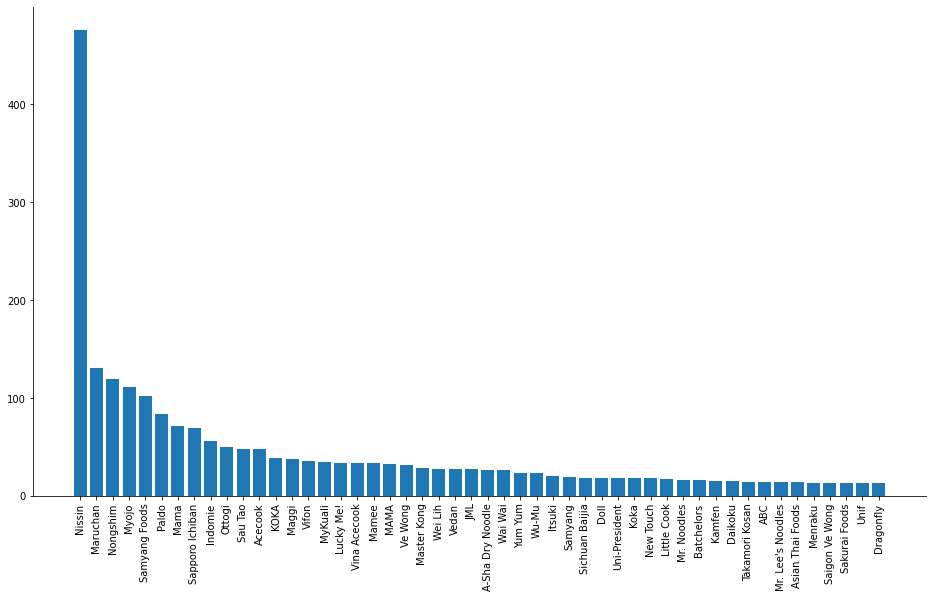

In [30]:
# plot a barplot for brand count
plt.figure(figsize = (16,9))
plt.bar(brand_count.index, brand_count)
plt.xticks(rotation = 90)
sns.despine()
plt.show()

In [31]:
# explore style
style_count = df["Style"].value_counts()
style_count

Pack          2085
Bowl           722
Cup            659
Tray           167
Box             54
Restaurant       3
Can              1
Bar              1
Name: Style, dtype: int64

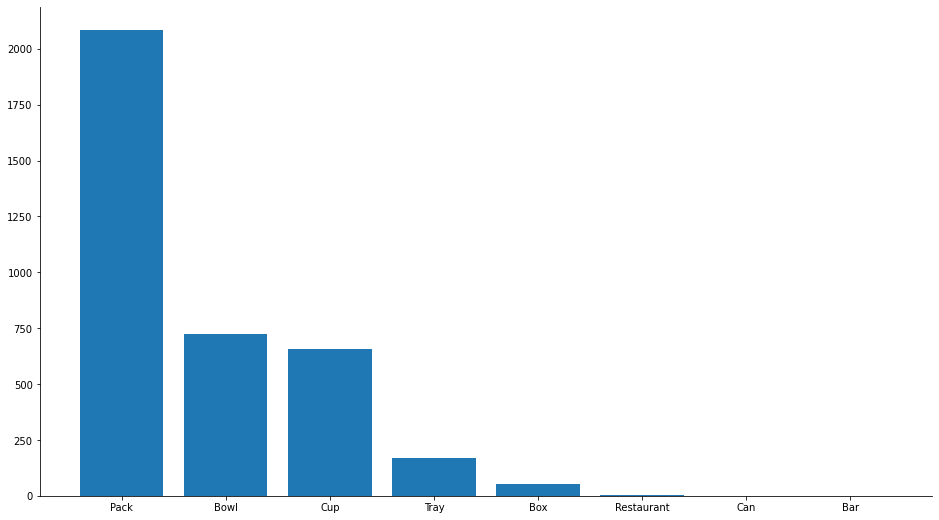

In [32]:
# plot a barplot for style count
plt.figure(figsize = (16, 9))
plt.bar(style_count.index, style_count)
sns.despine()
plt.show()

In [33]:
# explore country 
country_count = df["Country"].value_counts()
country_count

Japan                 681
United States         458
South Korea           411
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Nepal                  14
Myanmar                14
Bangladesh             12
Pakistan                9
Hungary                 9
Colombia                6
France                  6
Poland                  6
Sarawak                 5
Cambodia                5
Russia                  5
Fiji                    4
Italy                   4
Holland                 4
Peru                    4
Ukraine                 3
Sweden                  3
Finland                 3
Spain       

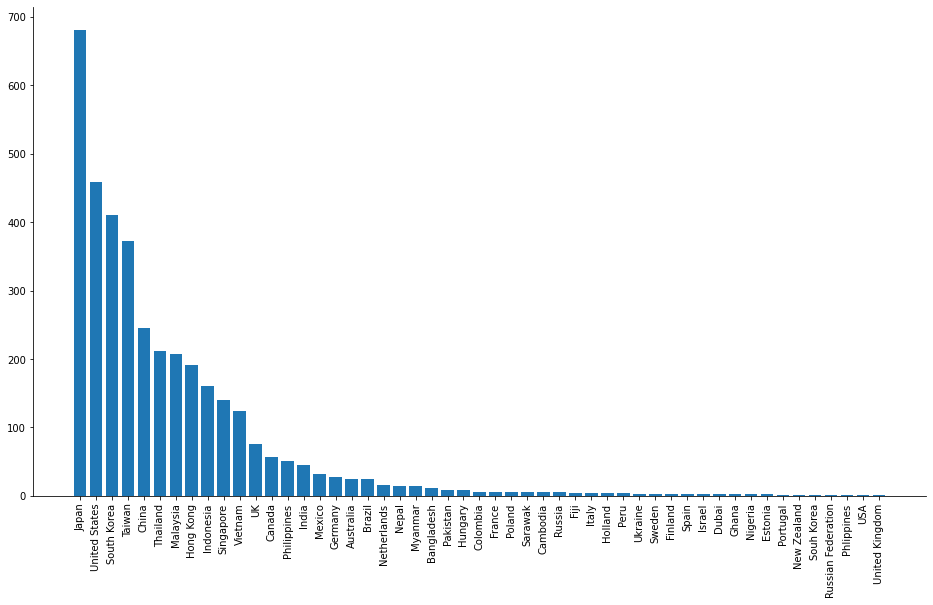

In [34]:
# plot a barplot for country count
plt.figure(figsize = (16, 9))
plt.bar(country_count.index, country_count)
plt.xticks(rotation = 90)
sns.despine()
plt.show()

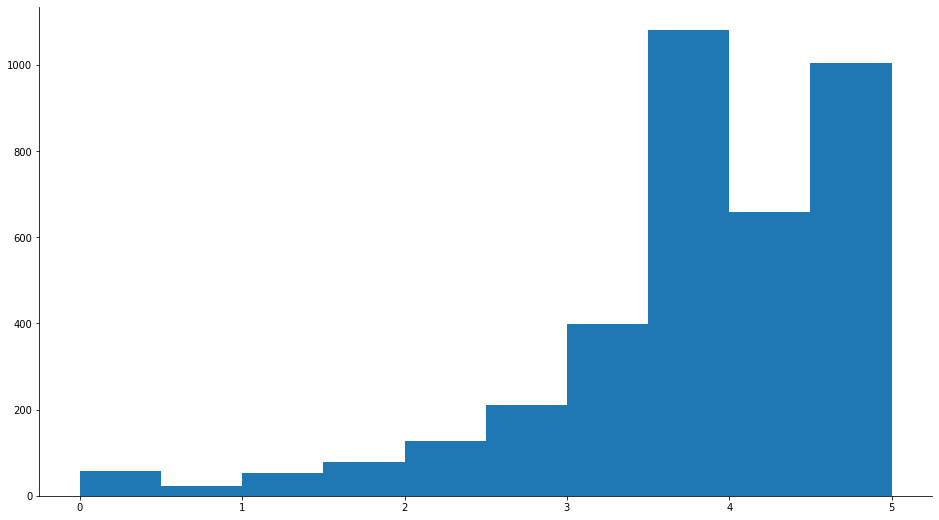

In [35]:
# examine distribution of scores in Stars column
plt.figure(figsize = (16, 9))
plt.hist(df["Stars"])
sns.despine()
plt.show()

From the histogram, we can tell that the data is heavily skewed and not normally distributed.

In [36]:
print("Mean of Stars column: {}".format(df["Stars"].mean()))
print("Median of Stars column: {}".format(df["Stars"].median()))

Mean of Stars column: 3.722684182015168
Median of Stars column: 3.75


<AxesSubplot:xlabel='isSpicy', ylabel='count'>

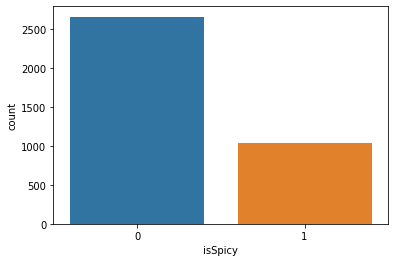

In [37]:
sns.countplot(x = df["isSpicy"])

<AxesSubplot:xlabel='hasChicken', ylabel='count'>

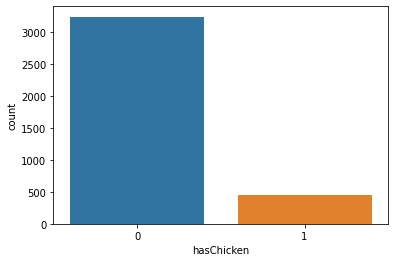

In [38]:
sns.countplot(x = df["hasChicken"])

<AxesSubplot:xlabel='hasBeef', ylabel='count'>

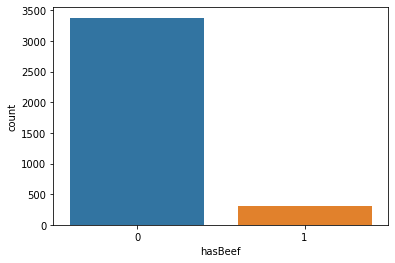

In [39]:
sns.countplot(x = df["hasBeef"])

<AxesSubplot:xlabel='hasSeafood', ylabel='count'>

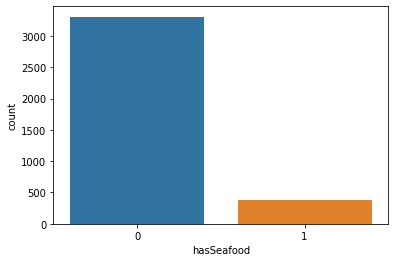

In [40]:
sns.countplot(x = df["hasSeafood"])

## Questions to ask
1. Which brand has the highest stars?
2. Which country has the highest stars?
3. Which noodle has the highest stars – spicy or non-spicy?

### Question 1: Which brand has the highest stars?

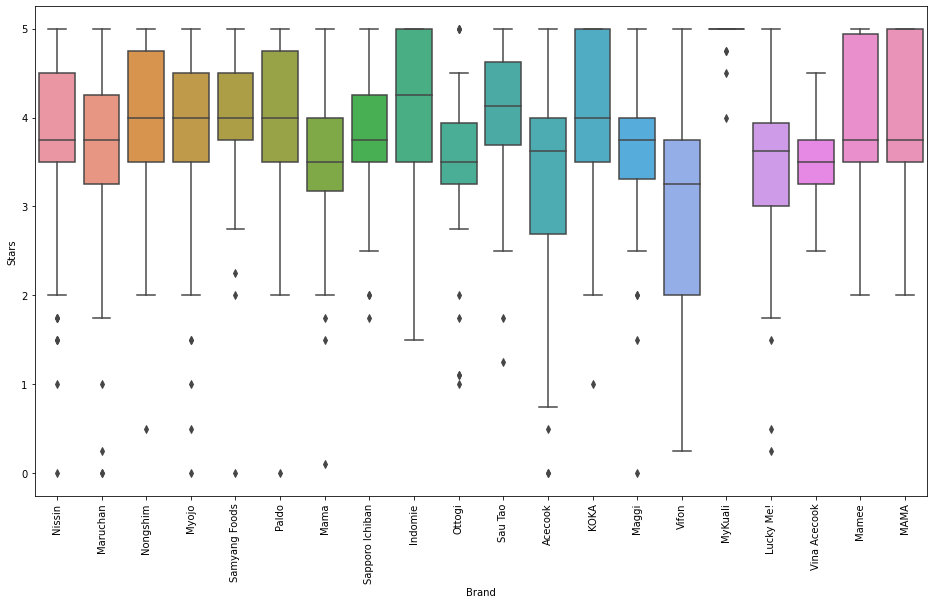

In [41]:
plt.figure(figsize = (16, 9))

# let's focus on the top 20 brands instead of 50 so the plot would not look overcrowded
sns.boxplot(x = df["Brand"], y = df["Stars"], order = brand_count.index[:20])
plt.xticks(rotation = 90)
plt.show()

From the boxplot, MyKuali seems to be rated very highly so let's investigate further.

In [42]:
df[df["Brand"] == "MyKuali"]

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
188,MyKuali,White Fish Broth Cup Noodle,Cup,Malaysia,5.00,0,0,0,1
199,MyKuali,Penang Red Tom Yum Goong Rice Vermicelli Soup ...,Bowl,Malaysia,5.00,1,0,0,0
213,MyKuali,White Fish Broth Rice Vermicelli,Bowl,Malaysia,5.00,0,0,0,1
229,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5.00,0,0,0,1
230,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5.00,1,0,0,0
490,MyKuali,Gaeng Som Noodle,Cup,Malaysia,4.50,0,0,0,0
942,MyKuali,Hokkien Prawn (2018 Recipe),Pack,Malaysia,5.00,0,0,0,1
951,MyKuali,Penang Red Tom Yum Goong Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
958,MyKuali,Penang White Curry Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
1020,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5.00,1,0,0,0


Seems like MyKuali has very good ramen noodles and consistently takes the cake for a full 5 stars rating.

### Question 2: Which country has the highest stars?

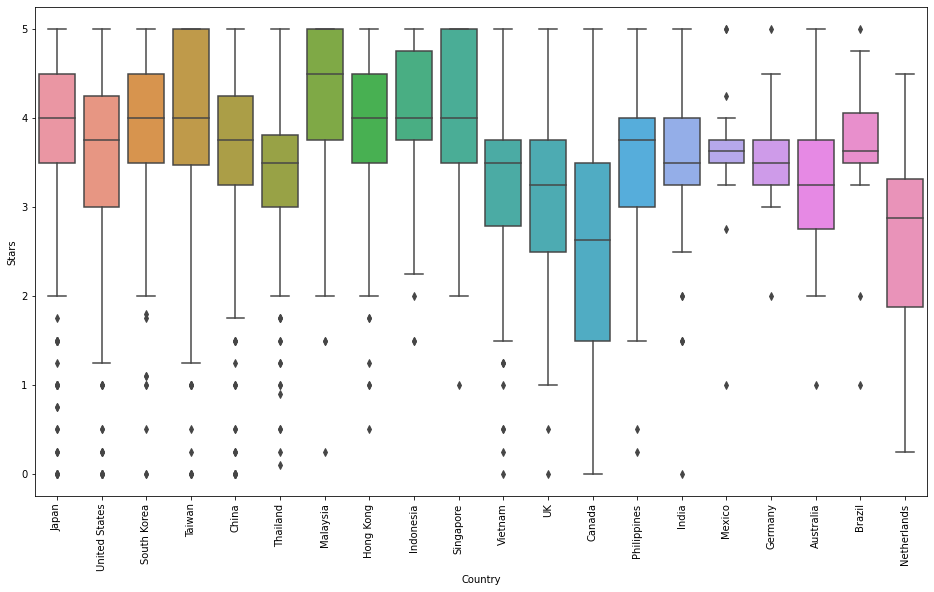

In [43]:
plt.figure(figsize = (16, 9))

# let's focus on the top 20 countries instead so the plot would not look overcrowded
sns.boxplot(x = df["Country"], y = df["Stars"], order = country_count.index[:20])
plt.xticks(rotation = 90)
plt.show()

It seems like Malaysia did pretty well and it's not surprising considering how most of the brand MyKuali comes from Malaysia.

### Question 3: Which noodle has the highest stars – spicy or non-spicy?

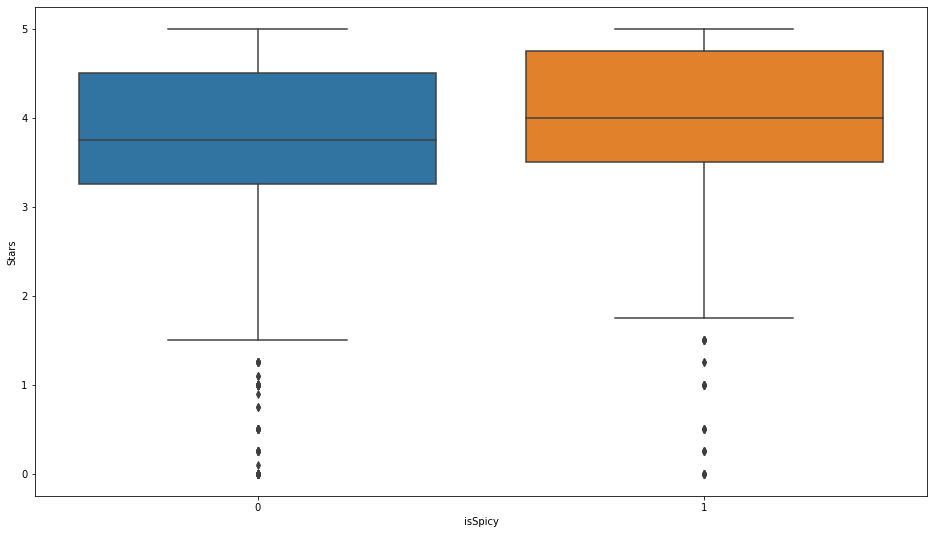

In [44]:
plt.figure(figsize = (16, 9))
sns.boxplot(x = df["isSpicy"], y = df["Stars"])
plt.show()

It seems like spicy flavoured ramen has a slight edge over non-spicy flavoured ramen. Now, let's run a statistical test to determine if this edge is significant or not.

In [45]:
# filter two dataframes
spicy_df = df[df["isSpicy"] == 1]
non_spicy_df = df[df["isSpicy"] == 0]

In [46]:
# examine ratings for spicy flavoured ramen
print("Mean stars for spicy flavoured ramen: {}".format(spicy_df["Stars"].mean()))
print("Median stars for spicy flavoured ramen: {}".format(spicy_df["Stars"].median()))

Mean stars for spicy flavoured ramen: 3.845135527589545
Median stars for spicy flavoured ramen: 4.0


In [47]:
# examine ratings for non-spicy flavoured ramen
print("Mean stars for non-spicy flavoured ramen: {}".format(non_spicy_df["Stars"].mean()))
print("Median stars for non-spicy flavoured ramen: {}".format(non_spicy_df["Stars"].median()))

Mean stars for non-spicy flavoured ramen: 3.675112824370064
Median stars for non-spicy flavoured ramen: 3.75


Is this difference statistically significant? We cannot conduct a p-test as the distribution is not normally distributed as illustrated in the histogram below. 

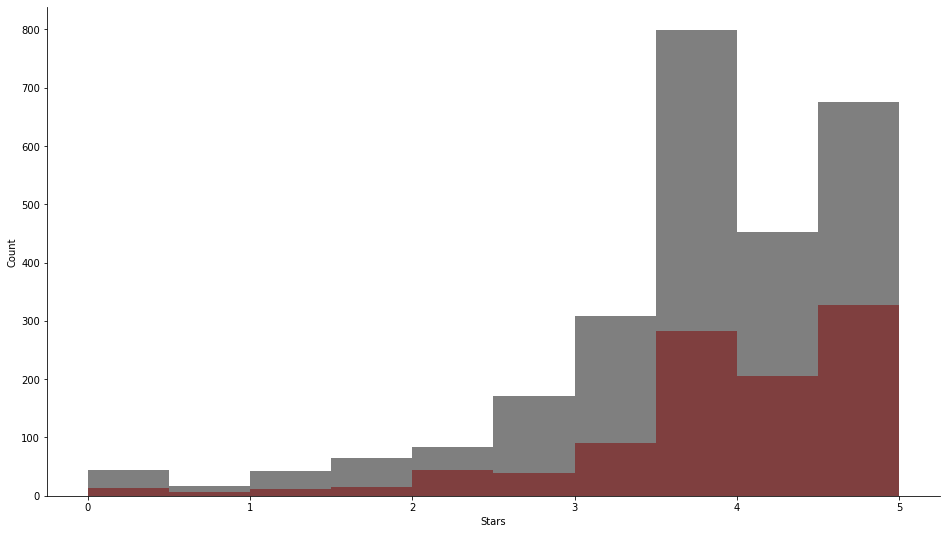

In [48]:
plt.figure(figsize = (16, 9))
plt.hist(x = spicy_df["Stars"], alpha = 0.5, color = "red")
plt.hist(x = non_spicy_df["Stars"], alpha = 0.5, color = "black")
sns.despine()
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

We can see that both distributions of spicy and non-spicy flavoured ramen are not normally distributed and the p-test will not work. Another way to display them on the same scale is by using the seaborn's statistical plot instead as shown below.

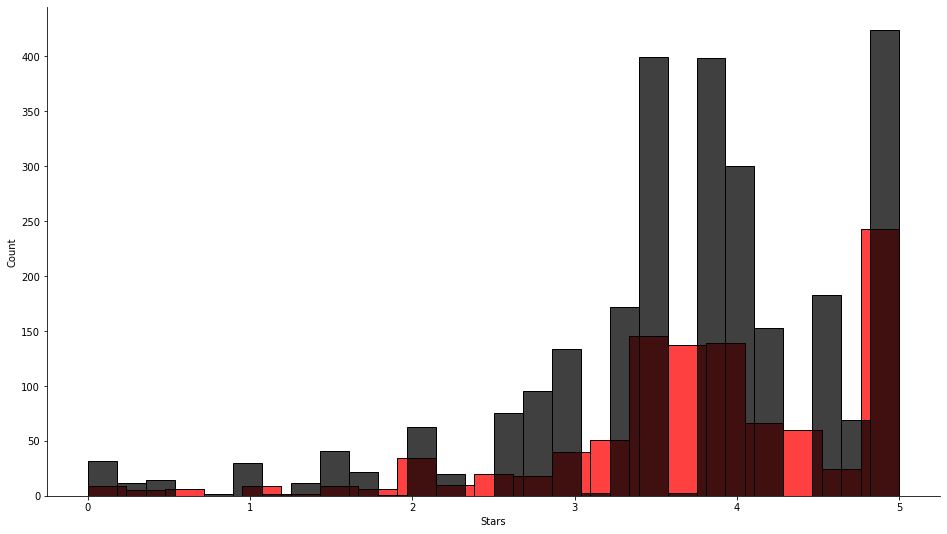

In [49]:
plt.figure(figsize = (16, 9))
sns.histplot(x = spicy_df["Stars"], color = "red")
sns.histplot(x = non_spicy_df["Stars"], color = "black")
sns.despine()
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

In [50]:
# import mann_whitney u test
from scipy.stats import mannwhitneyu

In [51]:
result = mannwhitneyu(spicy_df["Stars"], 
             non_spicy_df["Stars"])

print("The P-value is: {}".format(result[1]))

The P-value is: 1.2489797441151044e-07


Lo and behold, the p-value is less than 0.05 and this tells us that the spicy flavoured ramen is statistically different from the non-spicy flavoured ramen. Therefore, we can answer question 3 and conclude that spicy ramen rates higher than non-spicy ramen.

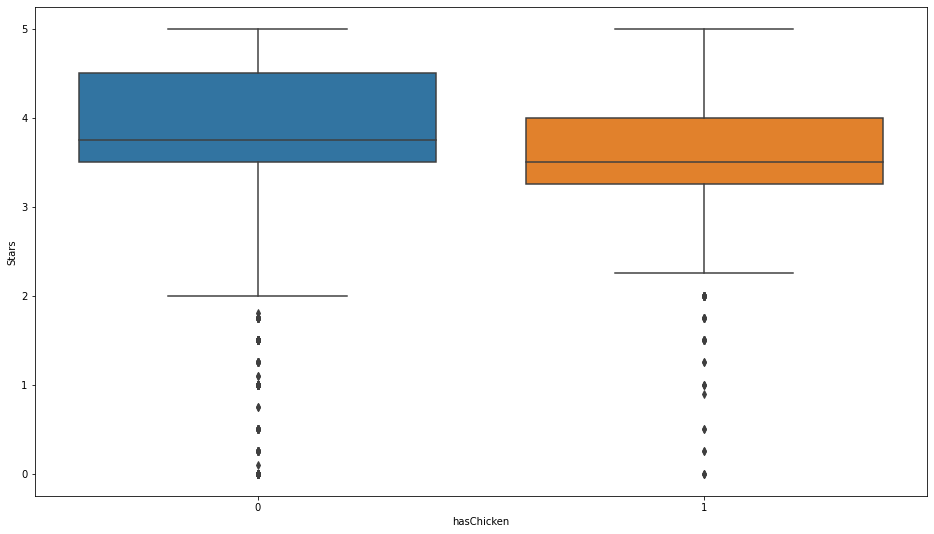

In [52]:
# examine how stars and chicken flavour relates to each other
plt.figure(figsize = (16,9))
sns.boxplot(x = df["hasChicken"], y = df["Stars"])
plt.show()

In [53]:
# conduct a mann whitney u test so investigate if this difference is significant
result = mannwhitneyu(df[df["hasChicken"] == 1]["Stars"],
                     df[df["hasChicken"] == 0]["Stars"])
print("The P-value is: {}".format(result[1]))

The P-value is: 4.504929299075213e-10


There is a statistical difference between ramen with chicken and without chicken.

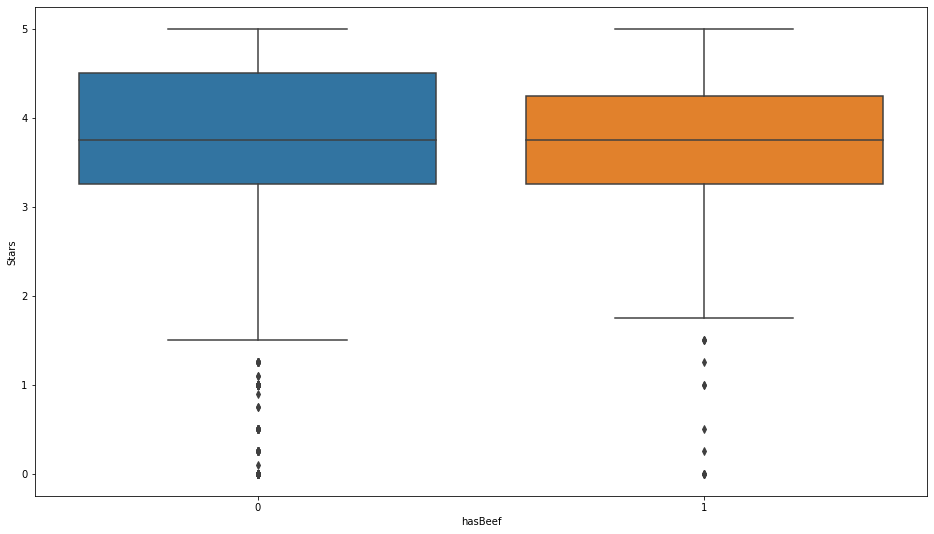

In [54]:
# examine how stars and beef flavour relates to each other
plt.figure(figsize = (16,9))
sns.boxplot(x = df["hasBeef"], y = df["Stars"])
plt.show()

In [55]:
# conduct a mann whitney u test so investigate if this difference is significant
result = mannwhitneyu(df[df["hasBeef"] == 1]["Stars"],
                     df[df["hasBeef"] == 0]["Stars"])
print("The P-value is: {}".format(result[1]))

The P-value is: 0.0035913084409697612


While not obvious from the boxplot, there is a statistical difference between ramen with beef and without beef.

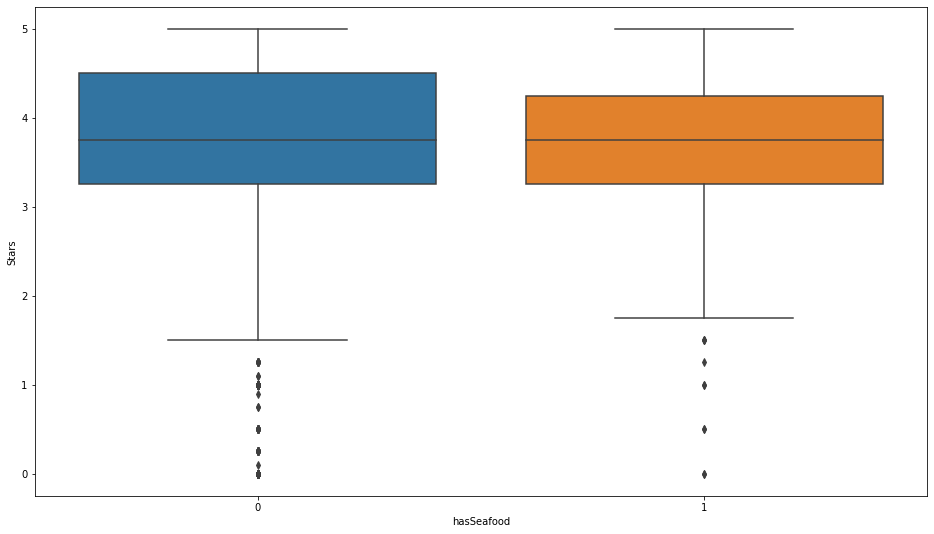

In [56]:
# examine how stars and seafood flavour relates to each other
plt.figure(figsize = (16,9))
sns.boxplot(x = df["hasSeafood"], y = df["Stars"])
plt.show()

In [57]:
# conduct a mann whitney u test so investigate if this difference is significant
result = mannwhitneyu(df[df["hasSeafood"] == 1]["Stars"],
                     df[df["hasSeafood"] == 0]["Stars"])
print("The P-value is: {}".format(result[1]))

The P-value is: 0.597640184021512


Similar to the beef statistical test, it is not obvious from the boxplot if there is a statistical difference. However, from the statistical test, we can conclude that there is no statistical difference as the p-value is more than 0.05.

In [58]:
# check dataframe, it should have four new columns
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


In [59]:
df.to_csv("thebiglist_clean_extended.csv", index = None)

## Part 3: Engineering Features and Preparing Data for Model Training
1. Convert low-frequency values into "Other"
2. Dummify the new columns
3. Drop unncessary columns 
4. Concatenate everything into a final DataFrame 

In [60]:
# read extended csv into dataframe
df = pd.read_csv("thebiglist_clean_extended.csv")
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


We have a lot of unique values in the Brand and Country columns so we have to reduce them so that when we dummify the columns, we don't end up with too many useless columns

In [61]:
# get value counts of top 30 brands
# this number is arbitrary
# you have to go back and forth from the machine learning model building in Part 4 to reach a reasonable value
top_thirty_brands = df["Brand"].value_counts()[:30].index
top_thirty_brands

Index(['Nissin', 'Maruchan', 'Nongshim', 'Myojo', 'Samyang Foods', 'Paldo',
       'Mama', 'Sapporo Ichiban', 'Indomie', 'Ottogi', 'Sau Tao', 'Acecook',
       'KOKA', 'Maggi', 'Vifon', 'MyKuali', 'Lucky Me!', 'Vina Acecook',
       'Mamee', 'MAMA', 'Ve Wong', 'Master Kong', 'Wei Lih', 'Vedan', 'JML',
       'A-Sha Dry Noodle', 'Wai Wai', 'Yum Yum', 'Wu-Mu', 'Itsuki'],
      dtype='object')

In [62]:
# we want to put the rest of the brands not in the top thirty into a category called "others"
# to do so, create a new column called newBrand
new_brand = []

# loop through brand and create new column newBrand
for brand in df["Brand"]:
    if brand in top_thirty_brands:
        new_brand.append(brand)
    else:
        new_brand.append("Other")
        
df["newBrand"] = new_brand
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,newBrand
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,Other
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,Other
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,Sau Tao
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,Sau Tao
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,Sapporo Ichiban
...,...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,Vifon
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,Wai Wai
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,Wai Wai
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,Wai Wai


In [63]:
print(df["newBrand"].value_counts())
print("The number of unique brands is {} brands".format(len(df["newBrand"].value_counts())))

Other               1781
Nissin               476
Maruchan             131
Nongshim             119
Myojo                111
Samyang Foods        102
Paldo                 84
Mama                  71
Sapporo Ichiban       69
Indomie               56
Ottogi                50
Sau Tao               48
Acecook               48
KOKA                  39
Maggi                 38
Vifon                 36
MyKuali               35
Mamee                 34
Vina Acecook          34
Lucky Me!             34
MAMA                  33
Ve Wong               32
Master Kong           29
Wei Lih               28
JML                   28
Vedan                 28
Wai Wai               26
A-Sha Dry Noodle      26
Yum Yum               23
Wu-Mu                 23
Itsuki                20
Name: newBrand, dtype: int64
The number of unique brands is 31 brands


In [64]:
# examine Style column
df["Style"].value_counts()

Pack          2085
Bowl           722
Cup            659
Tray           167
Box             54
Restaurant       3
Can              1
Bar              1
Name: Style, dtype: int64

In [65]:
# convert box, restaurant, can and bar into a new cateogry called "Other"
new_style = []
top_four_styles = df["Style"].value_counts().index[:4]

# loop through style and create new column newStyle
for style in df["Style"]:
    if style in top_four_styles:
        new_style.append(style)
    else:
        new_style.append("Other")
        
df["newStyle"] = new_style
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,newBrand,newStyle
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,Other,Pack
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,Other,Cup
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,Sau Tao,Pack
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,Sau Tao,Pack
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,Sapporo Ichiban,Cup
...,...,...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,Vifon,Bowl
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,Wai Wai,Pack
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,Wai Wai,Pack
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,Wai Wai,Pack


In [66]:
# check
df["newStyle"].value_counts()

Pack     2085
Bowl      722
Cup       659
Tray      167
Other      59
Name: newStyle, dtype: int64

In [67]:
# examine Country column
df["Country"].value_counts()

Japan                 681
United States         458
South Korea           411
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Nepal                  14
Myanmar                14
Bangladesh             12
Pakistan                9
Hungary                 9
Colombia                6
France                  6
Poland                  6
Sarawak                 5
Cambodia                5
Russia                  5
Fiji                    4
Italy                   4
Holland                 4
Peru                    4
Ukraine                 3
Sweden                  3
Finland                 3
Spain       

In [68]:
# get value counts of top 10 countries
# this number covers roughly about 80% of the Country column
# 80-20 rule
top_ten_countries = df["Country"].value_counts()[:10].index
top_ten_countries

Index(['Japan', 'United States', 'South Korea', 'Taiwan', 'China', 'Thailand',
       'Malaysia', 'Hong Kong', 'Indonesia', 'Singapore'],
      dtype='object')

In [69]:
# convert rest of countries not in top ten into a new category called "Other"
new_country = []

# loop through country to create new column newCountry
for country in df["Country"]:
    if country in top_ten_countries:
        new_country.append(country)
    else:
        new_country.append("Other")
        
df["newCountry"] = new_country
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,newBrand,newStyle,newCountry
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,Other,Pack,Japan
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,Other,Cup,China
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,Sau Tao,Pack,Hong Kong
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,Sau Tao,Pack,Hong Kong
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,Sapporo Ichiban,Cup,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,Vifon,Bowl,Other
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,Wai Wai,Pack,Thailand
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,Wai Wai,Pack,Thailand
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,Wai Wai,Pack,Thailand


In [70]:
df["newCountry"].value_counts()

Japan            681
Other            614
United States    458
South Korea      411
Taiwan           372
China            245
Thailand         212
Malaysia         207
Hong Kong        191
Indonesia        161
Singapore        140
Name: newCountry, dtype: int64

In [71]:
brand_dummy = pd.get_dummies(df["newBrand"], drop_first = True, prefix = "from")
brand_dummy

,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,from_Lucky Me!,from_MAMA,from_Maggi,from_Mama,from_Mamee,...,from_Sapporo Ichiban,from_Sau Tao,from_Ve Wong,from_Vedan,from_Vifon,from_Vina Acecook,from_Wai Wai,from_Wei Lih,from_Wu-Mu,from_Yum Yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
style_dummy = pd.get_dummies(df["newStyle"], drop_first = True, prefix = "is")
style_dummy

,is_Cup,is_Other,is_Pack,is_Tray
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
3687,0,0,0,0
3688,0,0,1,0
3689,0,0,1,0
3690,0,0,1,0


In [73]:
country_dummy = pd.get_dummies(df["newCountry"], drop_first = True, prefix = "in")
country_dummy

,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3687,0,0,0,0,1,0,0,0,0,0
3688,0,0,0,0,0,0,0,0,1,0
3689,0,0,0,0,0,0,0,0,1,0
3690,0,0,0,0,0,0,0,0,1,0


In [74]:
# drop Brand, Variety, Style and Country columns
df_temp = df.drop(["Brand", "Variety", "Style", "Country",
                  "newBrand", "newStyle", "newCountry"], axis = 1)
df_temp

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,5.0,0,0,0,1
1,3.5,1,0,0,0
2,5.0,1,0,0,1
3,4.5,0,0,0,0
4,3.5,0,0,0,0
...,...,...,...,...,...
3687,3.5,0,0,0,0
3688,1.0,0,0,0,0
3689,2.0,1,0,0,1
3690,2.0,1,0,0,0


In [75]:
df_final = pd.concat([df_temp, style_dummy, brand_dummy, country_dummy], axis = 1)
df_final

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,is_Cup,is_Other,is_Pack,is_Tray,from_Acecook,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,5.0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.5,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.5,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3689,2.0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3690,2.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
df_final.to_csv("thebiglist_clean_extended_final.csv", index = None)

## Part 4: Training a Machine Learning Model
1. Train a baseline model using DummyClassifier
2. Train three different models – LogisticRegression, DescisionTreeClassifier, RandomForestClassifier
3. Identify important features in the best performing model, if any

In [77]:
# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
# read csv from Part 3 into dataframe
df = pd.read_csv("thebiglist_clean_extended_final.csv")
df

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,is_Cup,is_Other,is_Pack,is_Tray,from_Acecook,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,5.0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.5,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.5,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3689,2.0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3690,2.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
# exmaine Stars column
df["Stars"].value_counts()

5.000    667
3.500    543
3.750    535
4.000    439
4.500    243
3.250    222
4.250    217
3.000    172
2.750    110
2.000     95
2.500     95
4.750     93
1.500     50
0.000     40
1.000     38
2.250     29
1.750     28
0.500     20
0.250     17
1.250     14
1.100      2
3.100      2
4.125      2
2.900      2
0.750      2
2.800      2
3.400      1
3.650      1
3.200      1
2.300      1
2.850      1
3.600      1
0.100      1
3.700      1
2.125      1
3.125      1
0.900      1
2.100      1
1.800      1
Name: Stars, dtype: int64

We notice that there are many star ratings with low frequencies and we will have to group these into a single category in order to proceed to classification with our machine learning model. 

We will determine any ratings above the cutoff to be "amazing" ratings and any ratings below to be "subpar". It is not easy to determine a cutoff star rating and there are many possible ways to do it. We can use the mean or median. But in this report, we will use the median to bin the star ratings.

In [80]:
# let's first determine the median star rating
df["Stars"].median()

3.75

In [81]:
# now let's use the pd.qcut function to split the star ratings into 1s and 0s
# 1s being those above the median and 0s being those below the median
df["binStars"] = pd.qcut(df["Stars"], q=2, labels = [0,1])
df

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,is_Cup,is_Other,is_Pack,is_Tray,from_Acecook,...,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States,binStars
0,5.0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,3.5,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3689,2.0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3690,2.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [82]:
df["binStars"].value_counts()

0    2031
1    1661
Name: binStars, dtype: int64

In [83]:
# prepare independent and dependent variables 
X = df.drop(["Stars", "binStars"], axis = 1) # independent variable
y = df["binStars"] # dependent variable

In [84]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    stratify = y) 
# straify to ensure proportions of y variable are same in both train and test sets

In [85]:
# set a baseline with DummyClassifier
dummy = DummyClassifier(strategy = "stratified")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

In [86]:
# access DummyClassifier model
result = confusion_matrix(y_test, dummy_pred)
result

array([[234, 173],
       [201, 131]])

In [87]:
print("True Negatives: {}".format(result[0][0]))
print("True Positives: {}".format(result[1][1]))
print("False Negatives: {}".format(result[1][0]))
print("False Positives: {}".format(result[0][1]))

True Negatives: 234
True Positives: 131
False Negatives: 201
False Positives: 173


We can see that the model does not do a very good job at predicting if a ramen is good or not good. The results are as good as simply guessing as there are as many false results as there are true results.

In [88]:
print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       0.54      0.57      0.56       407
           1       0.43      0.39      0.41       332

    accuracy                           0.49       739
   macro avg       0.48      0.48      0.48       739
weighted avg       0.49      0.49      0.49       739



## Now, let's try with other machine learning models

In [89]:
# start with LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)
logr_pred = logr.predict(X_test)

In [90]:
# access LogisticRegression model
confusion_matrix(y_test, logr_pred)

array([[264, 143],
       [119, 213]])

In [91]:
print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       407
           1       0.60      0.64      0.62       332

    accuracy                           0.65       739
   macro avg       0.64      0.65      0.64       739
weighted avg       0.65      0.65      0.65       739



From the results, we can already tell that the LogisticRegression model works better than the DummyClassifier model.

In [92]:
# move on to DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [93]:
confusion_matrix(y_test, tree_pred)

array([[266, 141],
       [119, 213]])

In [94]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       407
           1       0.60      0.64      0.62       332

    accuracy                           0.65       739
   macro avg       0.65      0.65      0.65       739
weighted avg       0.65      0.65      0.65       739



From the results, there isn't much improvement in the DecisionTreeClassifier model from the LogisticRegression model.

In [95]:
# move on to RandomForest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [96]:
confusion_matrix(y_test, forest_pred)

array([[263, 144],
       [112, 220]])

In [97]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       407
           1       0.60      0.66      0.63       332

    accuracy                           0.65       739
   macro avg       0.65      0.65      0.65       739
weighted avg       0.66      0.65      0.65       739



Once again, there isn't much improvement using the RandomForestClassifier model. So let's investigate further into the LinearRegression model. 

In [100]:
# access importance of LinearRegression model
logr.coef_[0]

array([ 0.42542057, -0.64969643, -0.23989033, -0.1659893 , -0.62482737,
        1.41525422,  0.07550349, -0.08708189, -0.98505651,  0.02995907,
        0.02896561,  0.07383266, -0.31377312,  0.18245935,  0.52698896,
       -0.22655311,  0.49098155, -0.42347333, -0.08975241,  0.47509944,
        1.91973289, -0.08790887,  0.17244318,  0.54970395, -0.31600999,
       -0.9704921 ,  0.14741409,  0.55172784, -0.13062149,  0.4002799 ,
       -0.89615898, -0.20087166, -0.75038249, -0.05254937, -0.61605357,
       -0.36432153, -0.2559642 ,  0.54229667,  0.19542537,  1.15240293,
        0.6420324 ,  0.66130792, -0.8572751 ,  0.77042458,  0.17058254,
        0.47170991, -0.92588174,  0.18622811])

In [101]:
# create a dataframe of columns with their respective importance
logr_feature = pd.DataFrame({"feature": X.columns,
                            "importance": logr.coef_[0]})

# rank columns based on their importance by sorting
logr_feature.sort_values("importance", ascending = False)

,feature,importance
20,from_MyKuali,1.919733
5,is_Other,1.415254
39,in_Indonesia,1.152403
43,in_Singapore,0.770425
41,in_Malaysia,0.661308
40,in_Japan,0.642032
27,from_Samyang Foods,0.551728
23,from_Nongshim,0.549704
37,from_Yum Yum,0.542297
14,from_MAMA,0.526989


As you can see, from our intial data exploratory analysis in previous parts, we accessed that MyKuali was a good predictor for whether the ramen was good or bad. This is not surprising that it also appeared to be the most important predictor in our LinearRegression model.

Similarly, we can access the importance of features in the other models as well.

In [102]:
# let's access importance of features in RandomForestClassifier model
forest.feature_importances_

array([0.09119619, 0.06148108, 0.04492669, 0.05650432, 0.05863802,
       0.02179819, 0.07526221, 0.02466686, 0.01035425, 0.0057475 ,
       0.00211337, 0.0057763 , 0.00515365, 0.00362019, 0.00683068,
       0.00440755, 0.01185576, 0.00533643, 0.01250992, 0.00680772,
       0.01754126, 0.01427029, 0.02873054, 0.01690944, 0.04045209,
       0.01157397, 0.00647667, 0.0103458 , 0.009252  , 0.00669131,
       0.0071134 , 0.00515695, 0.00570119, 0.00345546, 0.00597399,
       0.00386001, 0.00292401, 0.0054334 , 0.01771712, 0.01867364,
       0.02718306, 0.01521686, 0.09191864, 0.02048732, 0.0165908 ,
       0.0151437 , 0.02694759, 0.03327265])

In [103]:
# create a dataframe of columns with their respective importance
forest_feature = pd.DataFrame({"feature": X.columns,
                              "importance": forest.feature_importances_})

# rank columns based on their importance by sorting
forest_feature.sort_values("importance", ascending = False)

,feature,importance
42,in_Other,0.091919
0,isSpicy,0.091196
6,is_Pack,0.075262
1,hasChicken,0.061481
4,is_Cup,0.058638
3,hasSeafood,0.056504
2,hasBeef,0.044927
24,from_Other,0.040452
47,in_United States,0.033273
22,from_Nissin,0.028731


In [104]:
# let's now access importance of features in DecisionTreeClassifier model
tree.feature_importances_

array([9.57657042e-02, 3.99304943e-02, 4.39339631e-02, 4.20834862e-02,
       5.13751820e-02, 1.62535303e-02, 7.66486984e-02, 1.97769180e-02,
       1.04968029e-02, 5.24365984e-03, 6.89707800e-04, 4.33242192e-03,
       1.56179105e-03, 3.24229689e-03, 3.78126884e-03, 4.46720617e-03,
       1.72606584e-02, 6.11218157e-03, 7.15053788e-03, 8.28404292e-03,
       2.48199844e-02, 1.58737016e-02, 2.09356342e-02, 1.44880578e-02,
       3.19608686e-02, 1.30777008e-02, 2.95045980e-03, 1.16441003e-02,
       1.73962211e-02, 5.26171945e-03, 5.39134258e-03, 4.39719953e-03,
       6.71686610e-03, 1.26185026e-05, 7.91353277e-03, 6.75730634e-04,
       5.61119589e-03, 1.04941192e-02, 1.51384146e-02, 1.58752966e-02,
       1.60319960e-02, 7.95534127e-03, 1.48594889e-01, 2.45987555e-02,
       1.22863244e-02, 1.50874163e-02, 4.66350315e-02, 3.97849294e-02])

In [105]:
# create a dataframe of columns with their respective importance
tree_feature = pd.DataFrame({"feature": X.columns,
                              "importance": tree.feature_importances_})

# rank columns based on their importance by sorting
tree_feature.sort_values("importance", ascending = False)

,feature,importance
42,in_Other,0.148595
0,isSpicy,0.095766
6,is_Pack,0.076649
4,is_Cup,0.051375
46,in_Thailand,0.046635
2,hasBeef,0.043934
3,hasSeafood,0.042083
1,hasChicken,0.039930
47,in_United States,0.039785
24,from_Other,0.031961


Both the RandomForestClassifier model and DecisionTreeClassifier model have the isSpicy predictor high up in the importance ladder and this is already apparent from our initial exploratory data analysis and visualization in earlier parts.

## Conclusion
In this project, we have collected and wrangled the data into a tidy format for exploratory data analysis and visualization. Additional information and features were also extracted to help us better frame our strategy and understanding of the problem at hand. For instance, with our informed domain expertise (i.e. we have all eaten ramen, haven't we?), we were able to use our intuition and knowledge to extract additional relevant information from the variety column. Visualization of the extracted features in the data also proved to be helpful and statistical tests of difference were perfomed to evaluate its significance. New columns were engineered based on categorical columns and lastly, we trained several machine learning models to predict instant ramen binned stars rating.